In [3]:
from model import Classifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
clf = Classifier(1, DecisionTreeClassifier())

In [5]:
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [7]:
params_trial_1 = {
                'vect__max_features': (10000, 15000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (1000, 10000),
                'clf__min_samples_leaf': (1, 2 , 5),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['best', 'random']),    
                'clf__ccp_alpha': (0.001,0.0001),         
        }

clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.7min finished


done in 525.391s

scores!
mean: 0.427 std: (+/-0.031) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.429 std: (+/-0.031) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.428 std: (+/-0.029) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'best', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.428 std: (+/-0.029) for {'clf__ccp_alpha': 0.001, 'clf__criterion': 'gini', 'clf_

In [8]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 20 values
[{0.0001: 20}, {'gini': 20}, {10000: 11, 1000: 9}, {1: 12, 5: 1, 2: 7}, {0.01: 20}, {'best': 4, 'random': 16}, {'l2': 20}, {15000: 11, 10000: 9}, {(1, 1): 20}, {0: 9, 1: 11}]


In [11]:
params_trial_2 = {
                'vect__max_features': (15000, 20000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': (1000, 10000),
                'clf__min_samples_leaf': ([1]),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['random']),    
                'clf__ccp_alpha': ([0.0001, 0.00001]),         
        }

clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


done in 88.899s

scores!
mean: 0.495 std: (+/-0.021) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.493 std: (+/-0.026) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.498 std: (+/-0.013) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.490 std: (+/-0.011) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gin

In [12]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 4 values
[{1e-05: 1, 0.0001: 3}, {'gini': 4}, {1000: 3, 10000: 1}, {1: 4}, {0.01: 4}, {'random': 4}, {'l2': 4}, {20000: 2, 15000: 2}, {(1, 1): 4}, {0: 3, 1: 1}]


In [14]:
params_trial_3 = {
                'vect__max_features': (8000, 10000,15000),
                'vect__ngram_range': ([(1, 1)]),
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': (['l2']),
                'clf__criterion': (['gini']), 
                'clf__max_depth': ([1000, 5000]),
                'clf__min_samples_leaf': ([1]),
                'clf__min_samples_split': ([0.01]),                
                'clf__splitter': (['random']),    
                'clf__ccp_alpha': ([0.0001]),         
        }

clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   25.2s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.1s finished


done in 34.221s

scores!
mean: 0.499 std: (+/-0.021) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.496 std: (+/-0.021) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.492 std: (+/-0.026) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.491 std: (+/-0.031) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini

In [16]:
clf.eval_best_n_params(0.7)

Finding most common params for the top 2 values
[{0.0001: 2}, {'gini': 2}, {1000: 2}, {1: 2}, {0.01: 2}, {'random': 2}, {'l2': 2}, {10000: 1, 8000: 1}, {(1, 1): 2}, {0: 2}]


In [19]:
params_trial_final = {
                'vect__max_features': [8000],
                'vect__ngram_range': [(1, 1)],
                'vect__stop_words' : [stop_words_no_nums],
                'tfidf__norm': ['l2'],
                'clf__criterion': ['gini'], 
                'clf__max_depth': [1000],
                'clf__min_samples_leaf': ([1]),
                'clf__min_samples_split': [0.01],                
                'clf__splitter': ['random'],    
                'clf__ccp_alpha': [0.0001]              
        }

clf.fit(params_trial_final,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished


done in 8.684s

scores!
mean: 0.495 std: (+/-0.018) for {'clf__ccp_alpha': 0.0001, 'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.01, 'clf__splitter': 'random', 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
Best score:
0.495 (+/-0.018)
with parameters set:
	clf__ccp_alpha: 0.0001
	clf__criterion: 'gini'
	clf__max_depth: 1000
	clf__min_samples_leaf: 1
	clf__min_samples_split: 0.01
	clf__splitter: 'random'
	tfidf__norm: 'l2'
	vect__max_features: 8000
	vect__ngram_range: (1, 1)
	vect__stop_words: 0


Evaluation on test set:

Accuracy Score : 0.45724907063197023
Precision Score : 0.45724907063197023
Recall Score : 0.45724907063197023
F1 Score : 0.45724907063197023
Confusion Matrix
[[ 84  11   1   2   2   3   8   9   9  29   9   3   5  14  13  65  11   8
   10  23]
 [  1 188  32  21  13  30   8   7   6  25   4  12  19   4  11   0   4   2
    1   1]
 [  3  45 164  41  20  35   6   1   6  27   1   1  10  15   6   1   5   2
    2   3]
 [  0  25  31 154  55  19  16   1   2  18   1   4  43  12   5   0   1   1
    1   3]
 [  0  26   9  36 184   3  15   1  11  29   4   6  27  11   5   2   5   3
    1   7]
 [  3  46  37  19   7 191   5   1   2  19   1   8  28   4   9   2   6   1
    2   4]
 [  1  15   8  25  33   6 211   9   5  30   7   4  14   2  11   2   1   1
    1   4]
 [  5   8  10   2  12   3  25 185  20  51   7   2  22  14   7   3   8   2
    5   5]
 [  4   8   6   2   8   4  13  22 209  46   1   5  22  11   9   5   9   2
    7   5]
 [  4   5   1   3   4   3   8   2   6 224  77   4   

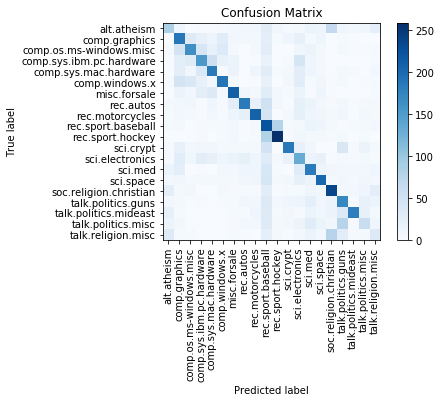

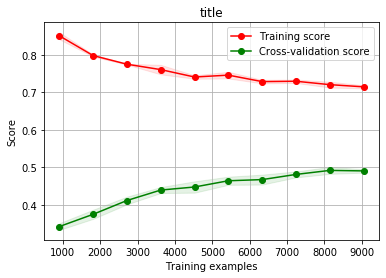

In [20]:
clf.eval_on_test([],False)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])